# Projeto usado para explicar o básico sobre Data Science na minha apresentação da Mostra Cultural do Colégio Nova Época

## Todas os dados foram extraídos do site InfoMoney: www.infomoney.com.br

### Algumas funções e imports

In [145]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [146]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [147]:
def grafico_linear(titulo, labelx, labely, x, y, dataset):
    grafico = sns.lineplot(x=x, y=y, data=dataset)
    grafico.figure.set_size_inches(16, 6)
    grafico.set_title(titulo, loc='left', fontsize=18)
    grafico.set_xlabel(labelx, fontsize=14)
    grafico.set_ylabel(labely, fontsize=14)
    return grafico

## Analisando o IPCA (Índice de Preços ao Consumidor Amplo)

In [148]:
dados_ipca = pd.read_csv('ipca-historico.csv', sep=';', encoding='utf-8')
dados_ipca = dados_ipca.iloc[0:2]
mes = dados_ipca.index[0]
mes = mes[1:]
porcentagem = dados_ipca.index[1]
porcentagem = porcentagem[1:]
dados_ipca = pd.DataFrame({
    'data' : mes,
    'porcentagem' : porcentagem
})
dados_ipca.head(n=5)

,data,porcentagem
0,julho 1994,6.84
1,agosto 1994,1.86
2,setembro 1994,1.53
3,outubro 1994,2.62
4,novembro 1994,2.81


## Fazendo alguns tratamentos e selecionando os valores entre janeiro de 2019 e julho de 2021

In [149]:
dados_ipca.data = [date.replace(' ', '/') for date in dados_ipca.data]

meses = {'janeiro':'01', 'fevereiro':'02','março':'03','abril':'04','maio':'05','junho':'06',
                      'julho':'07','agosto':'08','setembro':'09','outubro':'10','novembro':'11','dezembro':'12'
                      }
for data, i in zip(dados_ipca.data, range(dados_ipca.data.size)):
    for mes, numero in meses.items():
        data = data.replace(mes, numero)
        dados_ipca.data[i] = data

dados_ipca.data = pd.to_datetime(dados_ipca.data)
dados_ipca.head()

,data,porcentagem
0,1994-07-01,6.84
1,1994-08-01,1.86
2,1994-09-01,1.53
3,1994-10-01,2.62
4,1994-11-01,2.81


In [150]:
dias = dados_ipca[dados_ipca.data >= '2019-01-01'].data
porcentagem = dados_ipca[dados_ipca.data >= '2019-01-01'].porcentagem.apply(lambda x: float(x))
dados_ipca_tratado = pd.DataFrame({'data' : dias, 'ipca' : porcentagem})
dados_ipca_tratado.head()

,data,ipca
294,2019-01-01,0.32
295,2019-02-01,0.43
296,2019-03-01,0.75
297,2019-04-01,0.57
298,2019-05-01,0.13


In [151]:
update = pd.DataFrame({'data':'2021-07-01', 'ipca': 0.96}, index=[324])
update.data = pd.to_datetime(update.data)
update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 324 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1 non-null      datetime64[ns]
 1   ipca    1 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.0 bytes


In [152]:
dados_ipca_tratado = pd.concat([dados_ipca_tratado, update])
dados_ipca_tratado.index = range(len(dados_ipca_tratado.index))

In [153]:
dados_ipca_tratado = dados_ipca_tratado.iloc[:31]
dados_ipca_tratado.head()

,data,ipca
0,2019-01-01,0.32
1,2019-02-01,0.43
2,2019-03-01,0.75
3,2019-04-01,0.57
4,2019-05-01,0.13


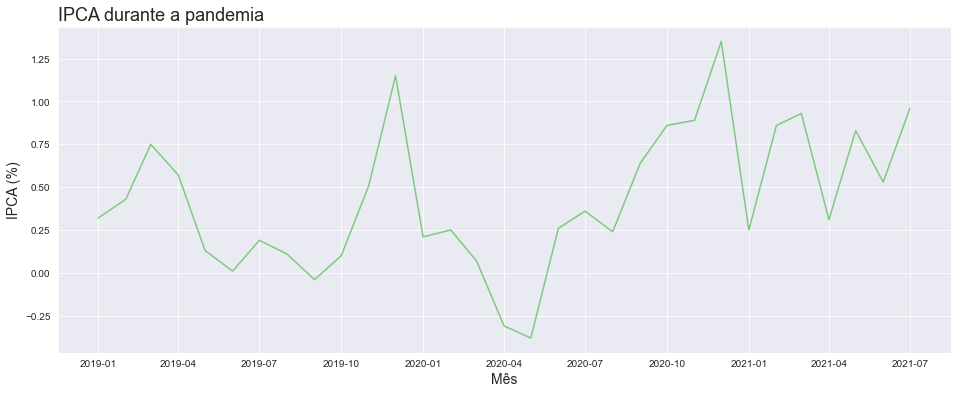

In [154]:
ipca_grafico = grafico_linear('IPCA durante a pandemia', 'Mês', 'IPCA (%)', 'data', 'ipca', dados_ipca_tratado)

# Analisando BTC por dia

In [155]:
btc_dia = {
    'data' : [f'2021-05-{str(x)}' for x in range(1, 32)],
    'preco': [57807, 56603, 57169, 53741, 57441, 56405, 57337, 58840, 58238, 55848, 56695, 49384, 49704, 49839, 46708, 46426, 43541, 42897, 36720, 40717, 37297, 37448, 34679, 38750, 38378, 39249, 38417, 35662, 34584, 35652, 37298]
}
btc_dia = pd.DataFrame(btc_dia)
btc_dia.data = pd.to_datetime(btc_dia.data)
btc_dia.preco = btc_dia.preco / 1000
btc_dia.tail()

,data,preco
21,2021-05-22,37.448
22,2021-05-23,34.679
23,2021-05-24,38.750
24,2021-05-25,38.378
25,2021-05-26,39.249
26,2021-05-27,38.417
27,2021-05-28,35.662
28,2021-05-29,34.584
29,2021-05-30,35.652
30,2021-05-31,37.298


In [156]:
btc_dia['velocidade'] = btc_dia.preco.diff()
btc_dia['aceleracao'] = btc_dia.velocidade.diff()

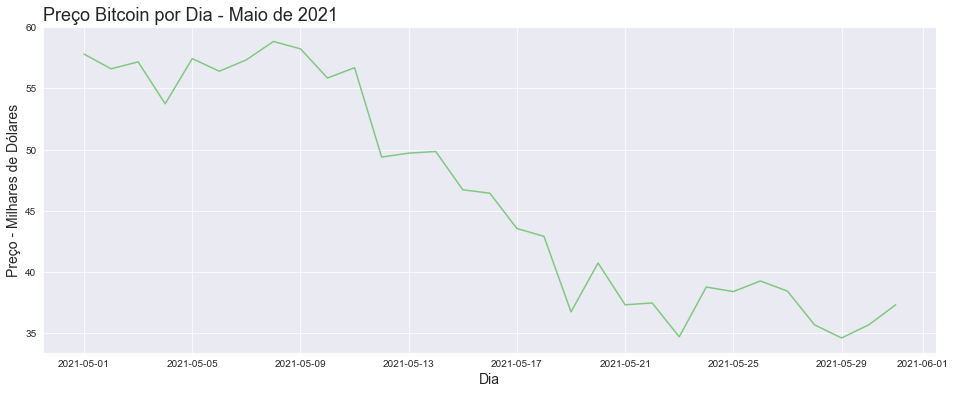

In [157]:
btc_dia_grafico1 = grafico_linear('Preço Bitcoin por Dia - Maio de 2021', 'Dia', 'Preço - Milhares de Dólares', 'data', 'preco', btc_dia)

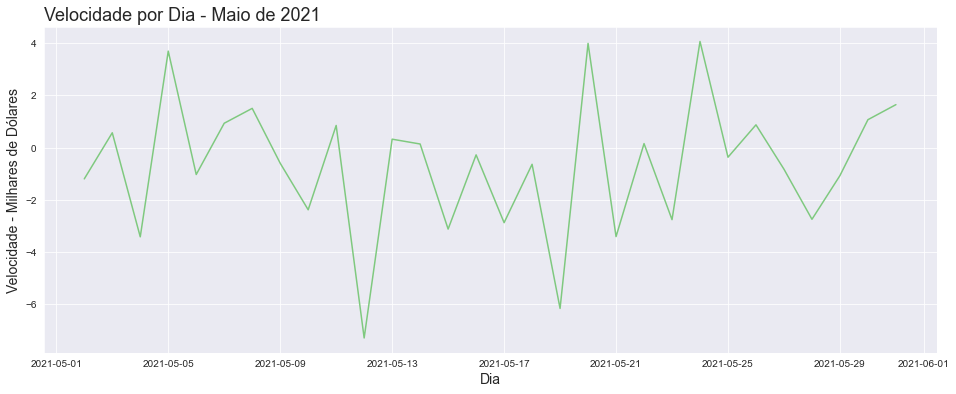

In [158]:
btc_dia_grafico2 = grafico_linear('Velocidade por Dia - Maio de 2021', 'Dia', 'Velocidade - Milhares de Dólares', 'data', 'velocidade', btc_dia)

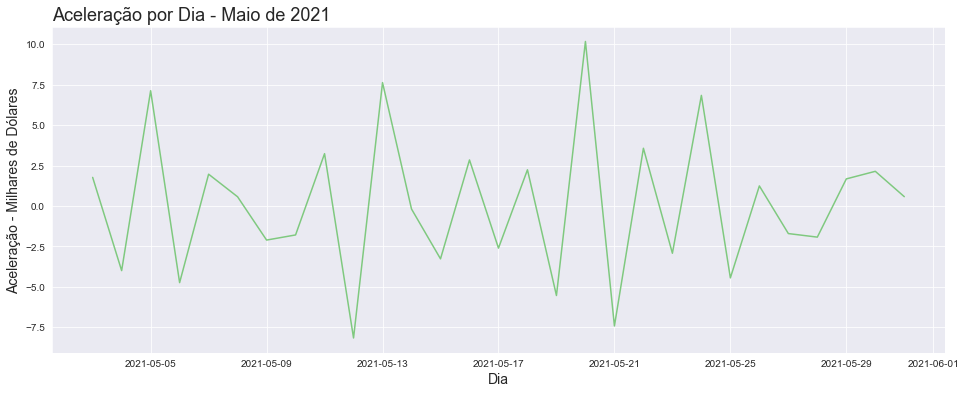

In [159]:
btc_dia_grafico3 = grafico_linear('Aceleração por Dia - Maio de 2021', 'Dia', 'Aceleração - Milhares de Dólares', 'data', 'aceleracao', btc_dia)

In [160]:
btc_dia['media_movel'] = btc_dia.preco.rolling(7).mean()
btc_dia['velocidade_media_movel'] = btc_dia.media_movel.diff()
btc_dia['aceleracao_media_movel'] = btc_dia.velocidade_media_movel.diff()

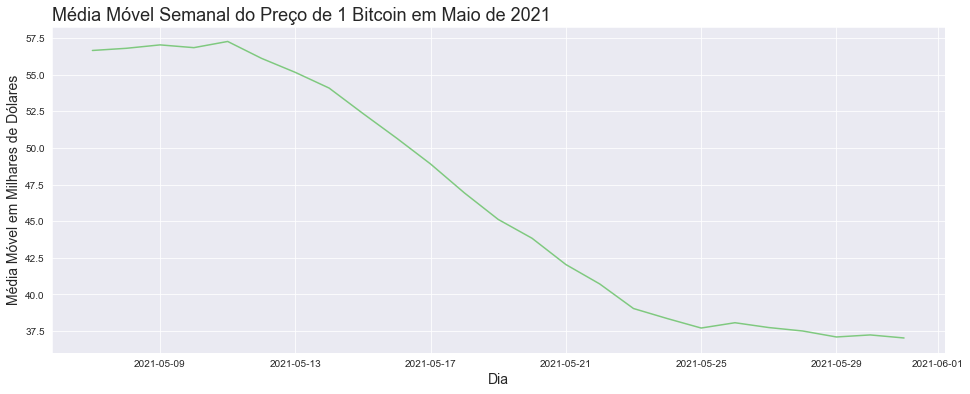

In [161]:
btc_dia_grafico4 = grafico_linear('Média Móvel Semanal do Preço de 1 Bitcoin em Maio de 2021', 'Dia', 'Média Móvel em Milhares de Dólares', 'data', 'media_movel', btc_dia)

## Após breve pesquisa, concluimos que a queda no preço das bitcoins em maio de 2021 aconteceu pois a empresa Tesla deixou de aceitar a criptomoeda como forma de pagamento, alegando que a prática de mineração de criptos não é sustentável, por conta do alto gasto energético, e portanto não condizia com o perfil da companhia. 

In [162]:
btc_dia.preco.describe()

count    31.000000
mean     46.434645
std       8.954348
min      34.584000
25%      37.913000
50%      46.426000
75%      56.504000
max      58.840000
Name: preco, dtype: float64

# Analisando as Ações da Magalu

### Importando os dados

In [163]:
mglu = pd.read_csv('mglu3-historico.csv', sep=',')
mglu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATA        992 non-null    object
 1   ABERTURA    992 non-null    object
 2   FECHAMENTO  992 non-null    object
 3   VARIAÇÃO    992 non-null    object
 4   MÍNIMO      992 non-null    object
 5   MÁXIMO      992 non-null    object
 6   VOLUME      992 non-null    object
dtypes: object(7)
memory usage: 54.4+ KB


### Tratando as informações

In [164]:
mglu.rename(columns = {'DATA' : 'data', 'FECHAMENTO' : 'valor_fechamento', 'ABERTURA' : 'valor_abertura', 'VARIAÇÃO' : 'variacao', 'MÍNIMO' : 'min', 'MÁXIMO' : 'max', 'VOLUME' : 'vol'}, inplace = True)

In [165]:
mglu.data = pd.to_datetime(mglu.data, format='%d/%m/%Y')

In [166]:
mglu.valor_fechamento = [float(valor.replace(',', '.', -1)) for _, valor in mglu.valor_fechamento.items()]

In [167]:
mglu.variacao = [float(valor.replace(',', '.', -1)) for _, valor in mglu.variacao.items()]

In [168]:
mglu.tail()

,data,valor_abertura,valor_fechamento,variacao,min,max,vol
987,2019-09-04,"9,13",9.26,3.68,"9,05","9,26","71,40M"
988,2019-09-03,"8,93",8.93,-2.00,"8,91","9,31","66,40M"
989,2019-09-03,"8,93",8.93,-2.00,"8,91","9,31","66,40M"
990,2019-09-02,"9,12",9.12,0.88,"8,98","9,20","59,00M"
991,2019-09-02,"9,12",9.12,0.88,"8,98","9,20","59,00M"


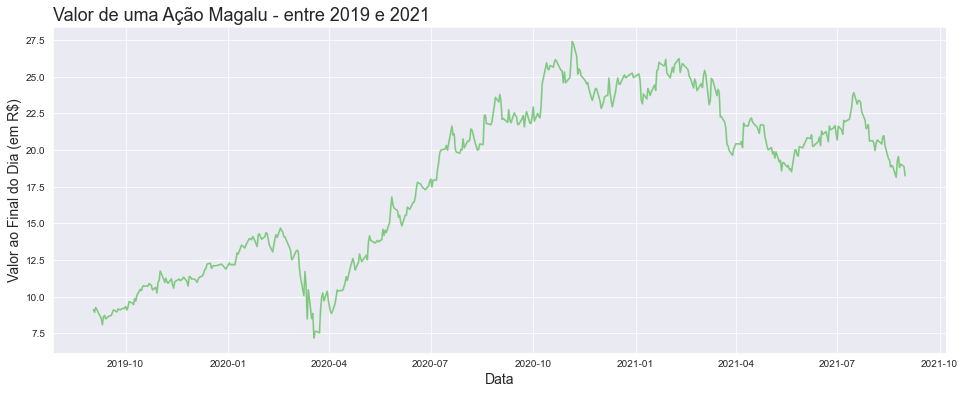

In [169]:
mglu1 = grafico_linear('Valor de uma Ação Magalu - entre 2019 e 2021', 'Data', 'Valor ao Final do Dia (em R$)', 'data', 'valor_fechamento', mglu)

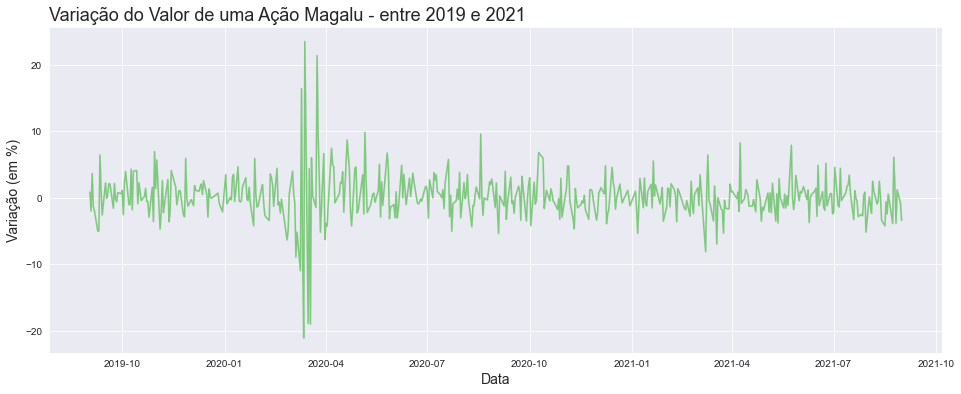

In [170]:
mglu2 = grafico_linear('Variação do Valor de uma Ação Magalu - entre 2019 e 2021', 'Data', 'Variação (em %)', 'data', 'variacao', mglu)

### Calculando a média móvel para comparar os resultados:

In [171]:
mglu['media_movel'] = mglu.valor_fechamento.rolling(15).mean()

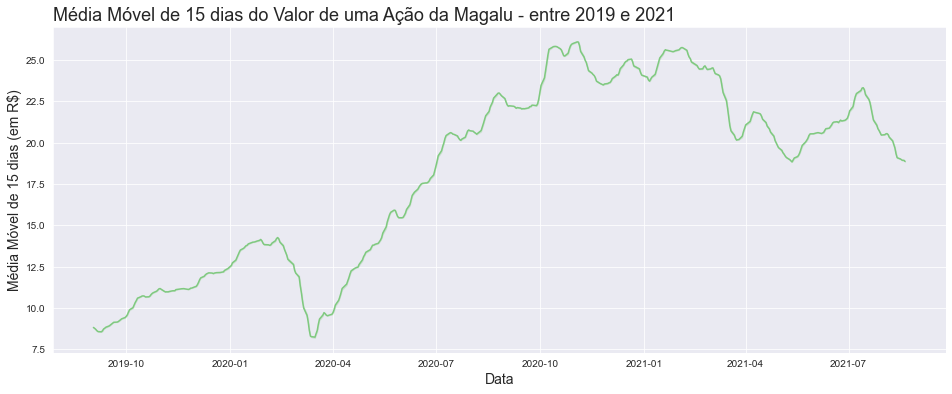

In [172]:
mglu3 = grafico_linear('Média Móvel de 15 dias do Valor de uma Ação da Magalu - entre 2019 e 2021', 'Data', 'Média Móvel de 15 dias (em R$)', 'data', 'media_movel', mglu)

### A alta no valor das ações a partir de abril pode ser explicada pela rápida e eficaz adaptação da empresa ao e-commerce

# Analisando Ações da Petrobras

## Leitura dos dados

In [173]:
petr = pd.read_csv('petr3-historico.csv', sep=',')
petr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATA        496 non-null    object
 1   ABERTURA    496 non-null    object
 2   FECHAMENTO  496 non-null    object
 3   VARIAÇÃO    496 non-null    object
 4   MÍNIMO      496 non-null    object
 5   MÁXIMO      496 non-null    object
 6   VOLUME      496 non-null    object
dtypes: object(7)
memory usage: 27.2+ KB


## Tratando as informações

In [174]:
petr.rename(columns = {'DATA' : 'data', 'FECHAMENTO' : 'valor_fechamento', 'ABERTURA' : 'valor_abertura', 'VARIAÇÃO' : 'variacao', 'MÍNIMO' : 'min', 'MÁXIMO' : 'max', 'VOLUME' : 'vol'}, inplace = True)

In [175]:
petr.data = pd.to_datetime(petr.data, format='%d/%m/%Y')

In [176]:
petr.valor_fechamento = [float(valor.replace(',', '.', -1)) for _, valor in petr.valor_fechamento.items()]
petr.variacao = [float(valor.replace(',', '.', -1)) for _, valor in petr.variacao.items()]

In [177]:
petr.head()

,data,valor_abertura,valor_fechamento,variacao,min,max,vol
0,2021-08-31,"28,71",27.92,-2.79,"27,73","28,78","855,78M"
1,2021-08-30,"28,88",28.72,-1.24,"28,66","29,26","450,39M"
2,2021-08-27,n/d,29.08,3.05,"28,38","29,11","271,37M"
3,2021-08-26,"28,17",28.22,-0.81,"28,16","28,65","502,59M"
4,2021-08-25,"28,30",28.45,0.25,"28,10","28,47","257,27M"


In [178]:
petr.tail()

,data,valor_abertura,valor_fechamento,variacao,min,max,vol
491,2019-09-06,"26,28",26.28,0.66,"25,93","26,49","124,54M"
492,2019-09-05,"26,11",26.11,0.62,"26,05","26,49","160,66M"
493,2019-09-04,"25,69",25.95,2.53,"25,67","26,09","181,39M"
494,2019-09-03,"25,31",25.31,0.50,"24,86","25,43","251,47M"
495,2019-09-02,"25,18",25.18,-1.06,"25,18","25,52","105,11M"


## Esboçando Gráficos

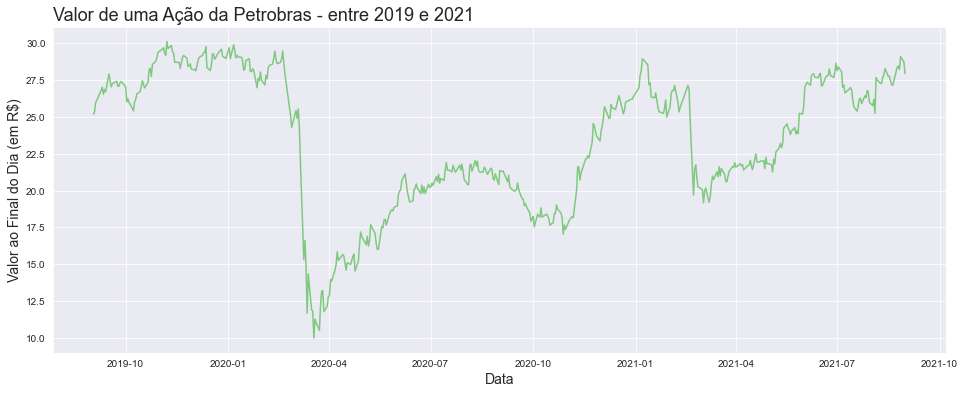

In [179]:
petr1 = grafico_linear('Valor de uma Ação da Petrobras - entre 2019 e 2021', 'Data', 'Valor ao Final do Dia (em R$)', 'data', 'valor_fechamento', petr)

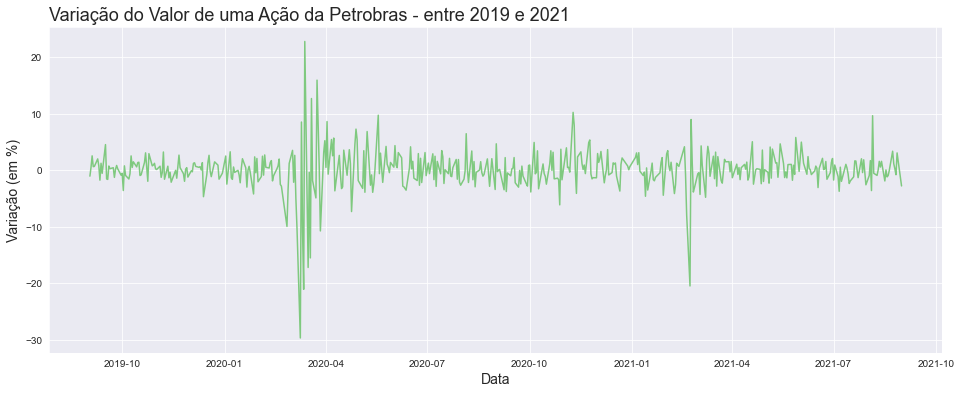

In [180]:
petr2 = grafico_linear('Variação do Valor de uma Ação da Petrobras - entre 2019 e 2021', 'Data', 'Variação (em %)', 'data', 'variacao', petr)

## Por conta do ruído muito alto, utilizaremos a média móvel

In [181]:
petr['media_movel'] = petr.valor_fechamento.rolling(15).mean()

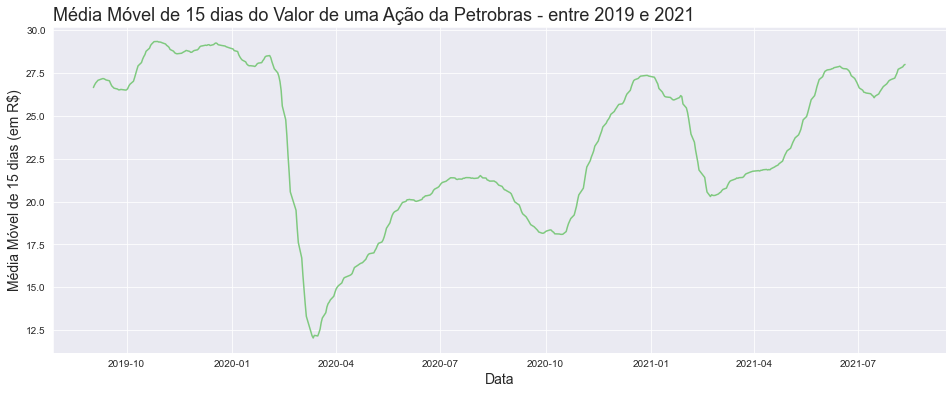

In [182]:
petr3 = grafico_linear('Média Móvel de 15 dias do Valor de uma Ação da Petrobras - entre 2019 e 2021', 'Data', 'Média Móvel de 15 dias (em R$)', 'data', 'media_movel', petr)

## Dados sobre IBOVESPA e do valor de um Barril de Petróleo

### Leitura e tratamento dos dados

In [183]:
ibovespa = pd.read_csv('ibov-historico.csv')
ibovespa.rename(columns = {'DATA' : 'data', 'FECHAMENTO' : 'valor_fechamento', 'ABERTURA' : 'valor_abertura', 'VARIAÇÃO' : 'variacao', 'MÍNIMO' : 'min', 'MÁXIMO' : 'max', 'VOLUME' : 'vol'}, inplace = True)
ibovespa.data = pd.to_datetime(ibovespa.data, format='%d/%m/%Y')
ibovespa.valor_fechamento = ibovespa.valor_fechamento
ibovespa.variacao = [float(valor.replace(',', '.', -1)) for _, valor in ibovespa.variacao.items()]

ibovespa.index = ibovespa.data
ibovespa.head()

,data,valor_abertura,valor_fechamento,variacao,min,max,vol
data,,,,,,,
2021-08-31,2021-08-31,119.738,118.781,-0.80,117.911,120.157,"42,45B"
2021-08-30,2021-08-30,120.677,119.740,-0.78,119.354,120.684,"25,73B"
2021-08-27,2021-08-27,118.725,120.678,1.65,118.721,120.678,"27,99B"
2021-08-26,2021-08-26,120.817,118.724,-1.73,118.719,120.833,"30,96B"
2021-08-25,2021-08-25,120.210,120.818,0.50,119.226,120.818,"29,70B"


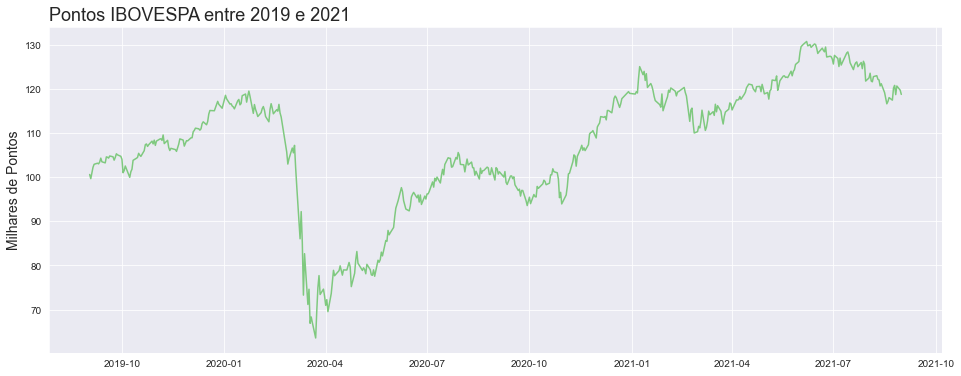

In [184]:
grafico_ibovespa = grafico_linear('Pontos IBOVESPA entre 2019 e 2021', '', 'Milhares de Pontos', 'data', 'valor_fechamento', ibovespa.dropna())

In [185]:
petroleo = pd.read_csv('petroleo-historico.csv')
petroleo.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.08.2021,"72,99","73,14","73,52","72,62","12,59K","-0,57%"
1,30.08.2021,"73,41","73,25","73,69","72,00","68,66K","0,98%"
2,27.08.2021,"72,70","71,53","72,76","71,17","92,20K","2,29%"
3,26.08.2021,"71,07","71,94","72,13","70,66","179,57K","-1,63%"
4,25.08.2021,"72,25","71,00","72,42","70,50","242,07K","1,69%"


In [186]:
petroleo = petroleo.drop(columns=['Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.'])
petroleo.rename(columns={'Data' : 'data', 'Último' : 'petroleo'}, inplace=True)
petroleo.data = pd.to_datetime(petroleo.data, format="%d.%m.%Y")
petroleo.petroleo = [float(valor.replace(',', '.', -1)) for _, valor in petroleo.petroleo.items()]
petroleo.tail()

,data,petroleo
511,2019-09-06,61.54
512,2019-09-05,60.95
513,2019-09-04,60.70
514,2019-09-03,58.26
515,2019-09-02,58.66


## Importando dados sobre a cotação do dólar para converter o valor do barril de petróleo para reais

In [187]:
usd = pd.read_csv('usd-historico.csv')
usd.head()

,Data,Último,Abertura,Máxima,Mínima,Var%
0,31.08.2021,"5,1492","5,1845","5,1973","5,1154","-0,67%"
1,30.08.2021,"5,1840","5,1999","5,2266","5,1817","-0,30%"
2,27.08.2021,"5,1996","5,2577","5,2615","5,1869","-1,00%"
3,26.08.2021,"5,2522","5,2097","5,2676","5,2097","0,78%"
4,25.08.2021,"5,2117","5,2482","5,2709","5,2058","-0,66%"


In [188]:
usd = usd.drop(columns=['Último', 'Máxima', 'Mínima', 'Var%'])
usd.rename(columns={'Data' : 'data', 'Abertura' : 'dolar'}, inplace=True)
usd.data = pd.to_datetime(usd.data, format="%d.%m.%Y")
usd.dolar = [float(valor.replace(',', '.', -1)) for _, valor in usd.dolar.items()]
usd.index = usd.data

In [189]:
petroleo.index = petroleo.data
petr.index = petr.data
ibovespa.index = ibovespa.data

In [190]:
petroleo.petroleo = petroleo.petroleo * usd.dolar
petroleo.tail()

,data,petroleo
data,,
2019-09-06,2019-09-06,252.843244
2019-09-05,2019-09-05,249.584155
2019-09-04,2019-09-04,252.961180
2019-09-03,2019-09-03,243.864708
2019-09-02,2019-09-02,243.087040


### Selecionando apenas as informações necessárias

In [191]:
dados_petroleo = pd.DataFrame(index = petr.data, data= {
    'Ação da Petrobras' : petr.valor_fechamento,
    'Pontos IBOVESPA' : ibovespa.valor_fechamento,
    'Barril de Petróleo' : petroleo.petroleo
})
dados_petroleo.dropna(inplace=True)
dados_petroleo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2021-08-31 to 2019-09-02
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ação da Petrobras   496 non-null    float64
 1   Pontos IBOVESPA     496 non-null    float64
 2   Barril de Petróleo  496 non-null    float64
dtypes: float64(3)
memory usage: 15.5 KB


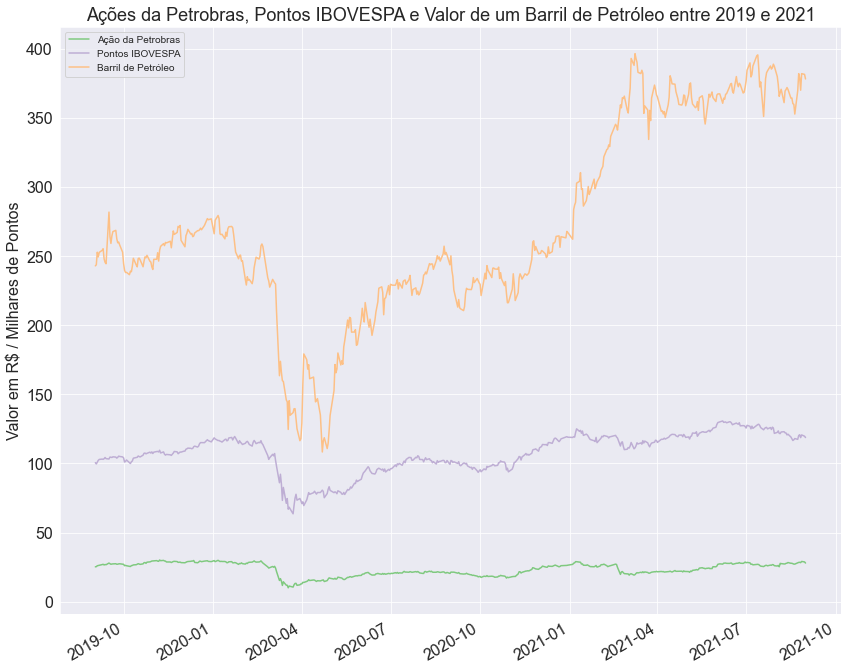

In [192]:
grafico = dados_petroleo.plot(kind='line', figsize=(14, 12), fontsize=16)

grafico.set_title('Ações da Petrobras, Pontos IBOVESPA e Valor de um Barril de Petróleo entre 2019 e 2021', fontsize=18)
grafico.set_xlabel('', fontsize=16)
grafico.set_ylabel('Valor em R$ / Milhares de Pontos', fontsize=16)
grafico = grafico

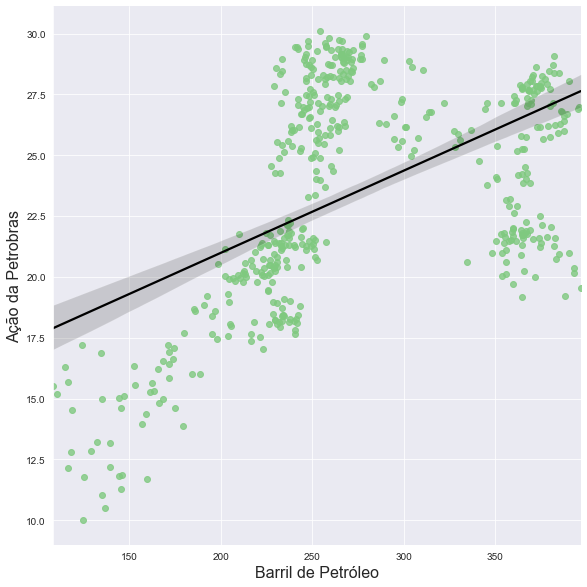

In [193]:
grafico2 = sns.lmplot(x='Barril de Petróleo', y='Ação da Petrobras', data=dados_petroleo, height=8, line_kws={'color':'black'})
grafico2.set_titles('Barris de Petróleo x Ações da Petrobras', fontsize=18)
grafico2.set_ylabels(fontsize=16)
grafico2.set_xlabels(fontsize=16)
grafico2 = grafico2

In [194]:
dados_petroleo.corr()

,Ação da Petrobras,Pontos IBOVESPA,Barril de Petróleo
Ação da Petrobras,1.000000,0.777823,0.521846
Pontos IBOVESPA,0.777823,1.000000,0.874607
Barril de Petróleo,0.521846,0.874607,1.000000


## Aplicando um Modelo de Regressão

In [195]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [196]:
x = dados_petroleo[['Barril de Petróleo', 'Pontos IBOVESPA']]
y = dados_petroleo['Ação da Petrobras']

In [197]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [198]:
rgs = linear_model.LinearRegression(fit_intercept=True, normalize=True)
rgs.fit(x_treino, y_treino)

LinearRegression(normalize=True)

In [199]:
rgs.score(x_teste, y_teste)

0.7552924642995498

## Testando outros Algoritmos - SVM

In [200]:
from sklearn import svm

In [201]:
x = dados_petroleo[['Barril de Petróleo', 'Pontos IBOVESPA']]
y = dados_petroleo['Ação da Petrobras']

In [202]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [203]:
svm_rgs = svm.SVR()
svm_rgs.fit(x_treino, y_treino)

SVR()

In [204]:
 svm_rgs.score(x_teste, y_teste)

0.6597814085335774

### Obtivemos uma precisão ligeiramente menor usando esse algoritmo

## Testando outros Algoritmos - Bayesian Ridge

In [205]:
x = dados_petroleo[['Barril de Petróleo', 'Pontos IBOVESPA']]
y = dados_petroleo['Ação da Petrobras']

In [206]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)

In [207]:
bay_rgs = linear_model.BayesianRidge(fit_intercept=True, normalize=True)
bay_rgs.fit(x_treino, y_treino)

BayesianRidge(normalize=True)

In [208]:
bay_rgs.score(x_teste, y_teste)

0.7390085623333444

### Obtivemos uma precisão praticamente igual ao primeiro algoritmo

## Fazendo Médias Móveis para Comparar os resultados:

In [209]:
dados_petroleo2 = dados_petroleo.copy()

In [210]:
dados_petroleo2['Ação da Petrobras'] = dados_petroleo2['Ação da Petrobras'].rolling(30).mean()
dados_petroleo2['Pontos IBOVESPA'] = dados_petroleo2['Pontos IBOVESPA'].rolling(30).mean() 
dados_petroleo2['Barril de Petróleo'] = dados_petroleo2['Barril de Petróleo'].rolling(30).mean()
dados_petroleo2.dropna(inplace=True)

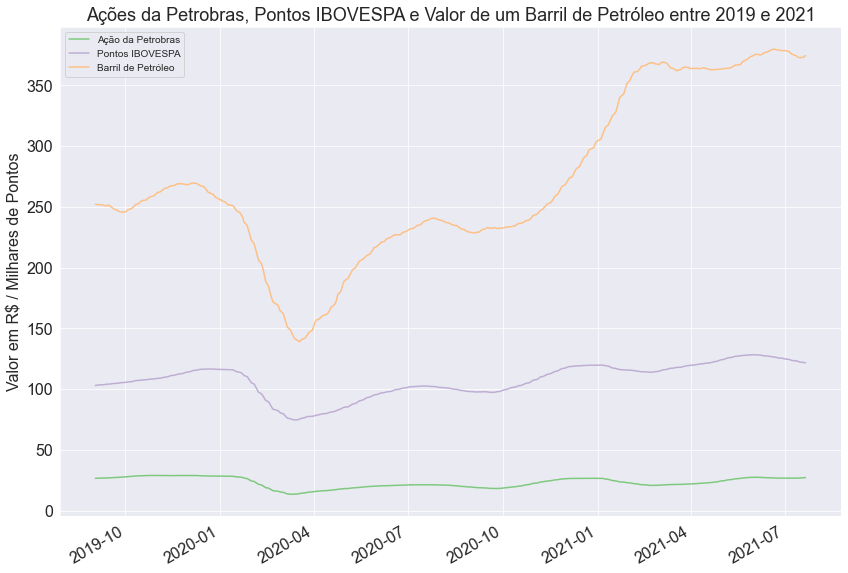

In [211]:
grafico3 = dados_petroleo2.plot(kind='line', figsize=(14, 10), fontsize=16)

grafico3.set_title('Ações da Petrobras, Pontos IBOVESPA e Valor de um Barril de Petróleo entre 2019 e 2021', fontsize=18)
grafico3.set_xlabel('', fontsize=16)
grafico3.set_ylabel('Valor em R$ / Milhares de Pontos', fontsize=16)
grafico3 = grafico3

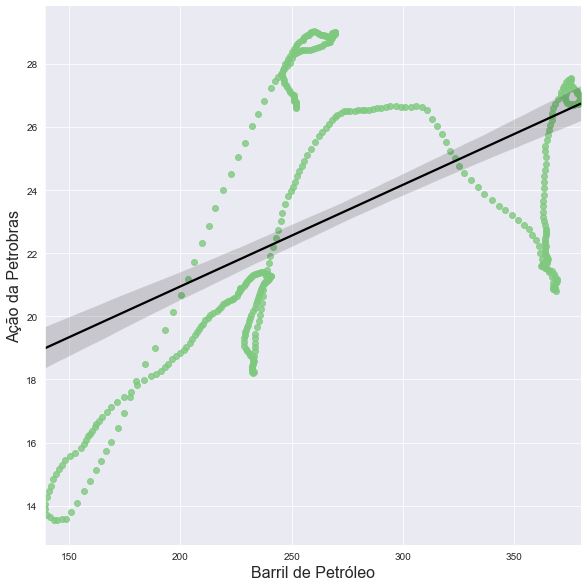

In [212]:
grafico4 = sns.lmplot(x='Barril de Petróleo', y='Ação da Petrobras', data=dados_petroleo2, height=8, line_kws={'color':'black'})
grafico4.set_titles('Barris de Petróleo x Ações da Petrobras', fontsize=18)
grafico4.set_ylabels(fontsize=16)
grafico4.set_xlabels(fontsize=16)
grafico4 = grafico4

In [213]:
dados_petroleo.describe()

,Ação da Petrobras,Pontos IBOVESPA,Barril de Petróleo
count,496.000000,496.000000,496.000000
mean,23.411310,107.489966,271.729194
std,4.543407,14.262058,70.173879
min,10.000000,63.570000,108.335808
25%,20.377500,100.230750,230.790975
50%,24.215000,108.705500,253.605303
75%,27.395000,118.432000,353.187768
max,30.110000,130.776000,396.700256


## Gerando dados aleatórios para testar as previsões

In [214]:
estatisticas_ibovespa = dados_petroleo['Pontos IBOVESPA'].describe()
estatisticas_petroleo = dados_petroleo['Barril de Petróleo'].describe()

In [215]:
dados_teste = pd.DataFrame({
    'Barril de Petróleo' : np.random.randint(estatisticas_petroleo['min'] * 100, high=estatisticas_petroleo['max'] * 100, size=15),
    'Pontos IBOVESPA' : np.random.randint(estatisticas_ibovespa['min'] * 1000, high=estatisticas_ibovespa['max'] * 1000, size=15)
})

In [216]:
dados_teste['Barril de Petróleo'] = dados_teste['Barril de Petróleo'] / 100
dados_teste['Pontos IBOVESPA'] = dados_teste['Pontos IBOVESPA'] / 1000

dados_teste.head()

,Barril de Petróleo,Pontos IBOVESPA
0,278.49,114.623
1,291.71,78.117
2,379.87,68.128
3,349.35,104.816
4,313.99,128.696


In [217]:
lm_previsoes = rgs.predict(dados_teste)
svm_previsoes = svm_rgs.predict(dados_teste)
bayesian_previsoes = bay_rgs.predict(dados_teste)

In [218]:
dados_teste['Ação da Petrobras - LM'] = lm_previsoes
dados_teste['Ação da Petrobras - LM'] = round(dados_teste['Ação da Petrobras - LM'], 2)

dados_teste['Ação da Petrobras - BayesianRidge'] = bayesian_previsoes
dados_teste['Ação da Petrobras - BayesianRidge'] = round(dados_teste['Ação da Petrobras - BayesianRidge'], 2)

dados_teste['Ação da Petrobras - SVM'] = svm_previsoes
dados_teste['Ação da Petrobras - SVM'] = round(dados_teste['Ação da Petrobras - SVM'], 2)

dados_teste.head(n=15)

,Barril de Petróleo,Pontos IBOVESPA,Ação da Petrobras - LM,Ação da Petrobras - BayesianRidge,Ação da Petrobras - SVM
0,278.49,114.623,26.15,26.21,26.54
1,291.71,78.117,9.86,9.32,23.93
2,379.87,68.128,1.92,0.77,21.65
3,349.35,104.816,19.01,18.55,24.77
4,313.99,128.696,30.76,30.84,27.48
5,115.93,125.800,37.66,38.74,16.81
6,199.34,101.560,23.77,24.06,19.51
7,380.18,93.057,12.67,11.87,22.83
8,283.82,66.306,5.09,4.42,22.79
9,273.34,117.721,27.70,27.83,26.59
